In [201]:
import numpy as np
import pandas as pd
import re

from IPython.display import display
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize  
from collections import Counter
import string

from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.utils import pprint
from konlpy.tag import Twitter

import os

from tqdm import tqdm
import ast

from gensim.models import Word2Vec
import random

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
kkma = Kkma()

In [5]:
twitter = Twitter()

C:\Users\Samsung\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# tag data 읽기

In [53]:
tag_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\tag\01 스킨 케어_네이버.xlsx")
a = tag_1["tag"][2]

In [54]:
ast.literal_eval(a)

SyntaxError: EOL while scanning string literal (<unknown>, line 1)

In [55]:
### 데이터가 짤렸다.

In [19]:
file_list = os.listdir(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data")
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
file_naver = [f for f in file_list_xlsx if f.endswith("네이버.xlsx")]
file_insta = [f for f in file_list_xlsx if f.endswith("인스타그램.xlsx")]

In [ ]:
review_ = data_1.iloc[:,-1].sum()
pos_ = kkma.pos(review_)

In [41]:
f_1 = file_naver[0]
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:00<00:00,  1.09s/it]


In [43]:
    d_1.head()

,브랜드명,브랜드명(영문),제품명(한글),제품명(영문),출시일자,기타,naver_blog_count,naver_blog_review,tag,words
0,로라메르시에,Laura Mercier,퓨리파잉 미셀라 워터,Purifying micellar water,20.05,#스킨케어에센셜컬렉션,0,[],"[([], Punctuation)]",[[]]
1,이니스프리,innisfree,애플씨드 립앤아이 리무버,Apple Seed Lip&Eye Remover,2019년 디자인 AD,"#애플씨드립앤아이리무버, #애플씨드, #애플씨드클렌징오일",159,['로드샵 중 가장 자주 이용하는 곳이 아닐까 싶은 이니스프리그러다 보니 공병도 자...,"[([', Punctuation), (로드, Noun), (샵, Suffix), (...","[[', 로드, 샵, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, ..."
2,포인트,POINT,딥클린 비타 휩 클렌징폼,deep clean vitawhip cleansing foam,2020.05,톤업클렌저,22,"['안녕하세요 뷰티블로거 라벤더에요 :)이미 시작된 여름, 자외선이 한층 강해지면서...","[([', Punctuation), (안녕하세요, Adjective), (뷰티, N...","[[', 안녕하세요, 뷰티, 블로거, 라벤더, 에요, :), 이미, 시작, 된, 여..."
3,슈에무라,shu uemura,블랑 크로마 클렌징 오일,Blanc:chroma cleansing oil,2019년 4월,톤업클렌징오일,31,['안녕하세요! 오늘은 제가 매일 저녁 사용하는 ...,"[([', Punctuation), (안녕하세요, Adjective), (!, Pu...","[[', 안녕하세요, !, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이..."
4,이솝,Aesop,젠틀 페이셜 클렌징 밀크,Gentle Facial Cleansing Milk,"2019, 4","밀크클렌저, 이솝클렌저, 클렌징밀크, 이솝스킨케어",11,"['Aesop 기초라인 구매후기 요즘 쓰던 앰플이 똑떨어져서 뭘사지 고민하다가, 문...","[([', Punctuation), (Aesop, Alpha), (기초, Noun)...","[[', Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, ..."


### stop words in
https://www.ranks.nl/stopwords/korean

# Frequency

### 1. 일단 전부 count 해보기

In [70]:
all_ = d_1["words"].sum()
ac = Counter(all_)

In [128]:
ac["이니스프리"]

142

In [71]:
ignore = stop_.split("\n")
for Word in list(ac):
    if Word in ignore:
        del ac[Word]

In [73]:
ac.most_common()

[(',', 11016),
 ('.', 7538),
 ('피부', 5208),
 ('사용', 3854),
 ('!', 3738),
 ('은', 3529),
 ('클렌징', 3524),
 ('제품', 3428),
 ('도', 3151),
 ('는', 2590),
 ('한', 2468),
 ('수', 2001),
 ('세안', 1774),
 ('오일', 1737),
 ('클', 1507),
 ('자극', 1502),
 ('하고', 1491),
 ('세', 1491),
 ('메이크업', 1439),
 ('성분', 1438),
 ('~', 1339),
 ('거품', 1334),
 ('요', 1320),
 ('할', 1307),
 ('워터', 1219),
 ('잘', 1191),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 (')', 1101),
 ('하는', 1081),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('다', 1051),
 ('(', 1047),
 ('케어', 1040),
 ('ml', 1016),
 ('1', 1014),
 ('라', 1011),
 ('느낌', 1010),
 ('해', 990),
 ('있는', 969),
 ('물', 949),
 ('징', 941),
 ('?', 937),
 ('약', 908),
 ('인', 902),
 ('분', 898),
 ('없이', 897),
 ('크림', 889),
 ('적', 886),
 ('산성', 851),
 ('만', 850),
 ('2', 828),
 ('추천', 817),
 ('/', 747),
 ('얼굴', 736),
 ('-', 734),
 ('화장', 717),
 ('정말', 696),
 ('형', 691),
 ('수분', 686),
 ('렌징', 683),
 ('타입', 682),
 ('입니다', 679),
 ('안', 677),
 ('각질', 675),
 ('에도', 662),
 ('이에요', 661),
 ('정력', 658),
 ('너무', 6

### 2. tag 별로만

In [83]:
# tag 의 종류
tag = []
for i in range(len(d_1)):
    for i in d_1["tag"][i]:
        tag.append(i[1])
Counter(tag)

Counter({'Punctuation': 38000,
         'Noun': 214555,
         'Suffix': 5833,
         'Verb': 52649,
         'Josa': 68950,
         'Adjective': 31055,
         'Number': 9261,
         'Foreign': 1746,
         'Adverb': 7978,
         'Conjunction': 790,
         'Alpha': 6155,
         'Modifier': 9263,
         'KoreanParticle': 1962,
         'Determiner': 2607,
         'Exclamation': 504,
         'VerbPrefix': 559,
         'Eomi': 117,
         'Hashtag': 1912,
         'URL': 362,
         'ScreenName': 22,
         'PreEomi': 7})

In [93]:
def tag_sear(df,pos):
    all_ = []
    wo = []
    for li in df["tag"]:
        for i in li:
            if i[1] == pos:
                all_.append(i)
                wo.append(i[0])
    return all_,wo

In [ ]:
def ignore_()

In [96]:
Counter((tag_sear(d_1,"Noun"))[1]).most_common(30)

[('피부', 5208),
 ('사용', 3853),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1039),
 ('느낌', 1010),
 ('물', 949),
 ('징', 941),
 ('크림', 889),
 ('산성', 851),
 ('추천', 817),
 ('제', 761),
 ('얼굴', 736),
 ('화장', 717)]

In [100]:
Counter((tag_sear(d_1,"Punctuation"))[1]).most_common(30)

[(',', 11008),
 ('.', 7537),
 ('!', 3737),
 ('~', 1337),
 (')', 1098),
 ('(', 1046),
 ('?', 937),
 ('/', 745),
 ('-', 733),
 ('@', 605),
 ("'", 553),
 ('!!', 540),
 ('..', 537),
 (':)', 505),
 ('+', 467),
 (':', 465),
 ('...', 395),
 ('#', 338),
 ("',", 331),
 ('@@', 308),
 ('&', 283),
 ('*', 280),
 ('[', 253),
 (']', 240),
 ('\\', 186),
 ('@@@', 182),
 ('^^', 181),
 ('!!!', 173),
 ('~~', 141),
 ('??', 106)]

In [104]:
Counter((tag_sear(d_1,"Verb"))[1]).most_common(100)

[('클', 1507),
 ('할', 1307),
 ('하는', 1081),
 ('잘', 1081),
 ('되어', 546),
 ('해', 543),
 ('하게', 491),
 ('한', 481),
 ('해서', 474),
 ('하면', 457),
 ('된', 450),
 ('되는', 394),
 ('하기', 392),
 ('하고', 375),
 ('써', 353),
 ('않고', 315),
 ('합니다', 304),
 ('보니', 298),
 ('하지', 296),
 ('해주는', 274),
 ('하면서', 214),
 ('했는데', 211),
 ('지워', 210),
 ('쓰고', 180),
 ('보면', 178),
 ('주는', 176),
 ('닦아', 169),
 ('하는데', 167),
 ('당김', 160),
 ('했어요', 159),
 ('하여', 158),
 ('해주고', 157),
 ('않는', 157),
 ('받아', 151),
 ('본', 146),
 ('가', 142),
 ('되고', 139),
 ('큰', 137),
 ('클라', 136),
 ('해도', 135),
 ('쓰는', 134),
 ('들', 129),
 ('될', 124),
 ('않은', 122),
 ('받은', 119),
 ('센', 119),
 ('않아서', 117),
 ('해주면', 116),
 ('보여', 115),
 ('해요', 114),
 ('쓸', 114),
 ('해야', 113),
 ('해보세요', 112),
 ('않아도', 112),
 ('덜어', 112),
 ('쉽게', 110),
 ('했을', 110),
 ('넘', 110),
 ('갈', 109),
 ('지울', 108),
 ('참', 108),
 ('지워지는', 107),
 ('몰', 106),
 ('됩니다', 104),
 ('바르고', 104),
 ('나서', 99),
 ('비오', 98),
 ('낸', 96),
 ('파우', 95),
 ('묻혀', 93),
 ('당김이', 93),
 ('센시', 93

In [107]:
Counter((tag_sear(d_1,"Adjective"))[1]).most_common(100)

[('있는', 969),
 ('입니다', 675),
 ('있어요', 563),
 ('같아요', 556),
 ('좋은', 547),
 ('부드럽게', 460),
 ('같은', 413),
 ('깨끗하게', 359),
 ('촉촉한', 332),
 ('깔끔하게', 297),
 ('있어서', 293),
 ('미', 283),
 ('부드러운', 280),
 ('없는', 271),
 ('순한', 234),
 ('안녕하세요', 227),
 ('있어', 223),
 ('촉촉하게', 217),
 ('더마', 215),
 ('아니라', 200),
 ('민감한', 199),
 ('부드럽고', 187),
 ('많은', 181),
 ('좋아요', 178),
 ('있는데', 169),
 ('가볍게', 165),
 ('굉장히', 161),
 ('순하게', 158),
 ('그런', 156),
 ('확실히', 154),
 ('건강한', 154),
 ('산뜻한', 150),
 ('꼼꼼하게', 148),
 ('촉촉하고', 145),
 ('이런', 139),
 ('충분히', 137),
 ('그럼', 136),
 ('없고', 134),
 ('있답니다', 131),
 ('성한', 127),
 ('있는데요', 124),
 ('좋을', 124),
 ('있습니다', 120),
 ('좋고', 115),
 ('아닌', 114),
 ('진한', 112),
 ('있고', 110),
 ('가능한', 110),
 ('예쁜', 108),
 ('있다', 107),
 ('착한', 106),
 ('좋았어요', 106),
 ('그런지', 105),
 ('순하고', 104),
 ('있을', 103),
 ('예민한', 99),
 ('건조한', 98),
 ('없어서', 97),
 ('있다고', 93),
 ('좋더라구요', 93),
 ('가벼운', 93),
 ('있었어요', 92),
 ('있으니', 91),
 ('풍부한', 90),
 ('필요한', 90),
 ('강력한', 88),
 ('유명한', 87),
 ('깔끔한', 81),


In [113]:
d_1["words"][1]

["['",
 '로드',
 '샵',
 '중',
 '가장',
 '자주',
 '이용',
 '하는',
 '곳',
 '이',
 '아닐까',
 '싶은',
 '이니스프리',
 '그러다',
 '보니',
 '공병',
 '도',
 '자주',
 '모이는',
 '편',
 '인데',
 '자잘하게',
 '적립',
 '하다가',
 '이번',
 '에는',
 '모아서',
 '한',
 '번',
 '에',
 '적립',
 '하고',
 '왔다',
 '.',
 '월',
 '최대',
 '적립',
 '수량',
 '은',
 '10',
 '개',
 '로',
 '공병',
 '당',
 '적립',
 '포인트',
 '는',
 '300',
 '점',
 '이번',
 '에는',
 '총',
 '8',
 '개',
 '를',
 '적립',
 '해서',
 '2,400원',
 '의',
 '포인트',
 '를',
 '받았다',
 '.',
 '이니스프리',
 '공병',
 '적립',
 '기준',
 '최근',
 '에',
 '공병',
 '적립',
 '기준',
 '이',
 '변경',
 '돼서',
 '수거',
 '불가능한',
 '품목',
 '들',
 '이',
 '더',
 '많이',
 '생긴듯',
 '하네용',
 '사진',
 '출처',
 ':',
 '이니스프리',
 '홈페이지',
 '그리고',
 '우연히',
 '알',
 '게',
 '된',
 '이니스프리',
 '스무살',
 '생일',
 '이벤트',
 '에',
 '참여',
 '해서',
 '35%',
 '쿠폰',
 '을',
 '받았다',
 '!',
 '공병',
 '적립',
 '하러',
 '가는',
 '길',
 '에',
 '돈',
 '쓰고',
 '왔습니다',
 ';',
 '이벤트',
 '는',
 '지금',
 '들어가',
 '보니',
 '선착순',
 '종료',
 '된',
 '걸',
 '로',
 '나오네요',
 'T',
 '0',
 'T',
 '쿠폰',
 '번호',
 '는',
 '문자',
 '로',
 '받았습니다',
 '.',
 '사',
 '용기',
 '간',
 '은',
 '5/1일',
 '~',
 '

In [115]:
model = Word2Vec(sentences=d_1["words"], window = 2, min_count=0,iter=100, sg=1)

In [118]:
Counter((tag_sear(d_1,"Noun"))[1]).most_common(30)

[('피부', 5208),
 ('사용', 3853),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1039),
 ('느낌', 1010),
 ('물', 949),
 ('징', 941),
 ('크림', 889),
 ('산성', 851),
 ('추천', 817),
 ('제', 761),
 ('얼굴', 736),
 ('화장', 717)]

In [120]:
model_result = model.wv.most_similar("화장")
model_result

[('솜', 0.7934973835945129),
 ('메이크업', 0.6675730347633362),
 ('줄였다고요', 0.6238407492637634),
 ('닦아내다', 0.559973955154419),
 ('사놨으니', 0.5432403683662415),
 ('먹는게', 0.5424444079399109),
 ('하든', 0.5333450436592102),
 ('적혀주시고', 0.5310585498809814),
 ('두둑하게', 0.5280333161354065),
 ('낭비', 0.5204619765281677)]

### 3. 원하는 tag 들로만 결과

In [184]:
tag = []
for i in range(len(d_1)):
    for i in d_1["tag"][i]:
        tag.append(i[1])
Counter(tag)

Counter({'Noun': 214555,
         'Verb': 52649,
         'Josa': 68950,
         'Adjective': 31055,
         'Number': 9261,
         'Foreign': 1746,
         'Adverb': 7978,
         'Conjunction': 790,
         'Alpha': 6155,
         'Modifier': 9263,
         'KoreanParticle': 1962,
         'Determiner': 2607,
         'Exclamation': 504,
         'VerbPrefix': 559,
         'Eomi': 117,
         'Hashtag': 1912,
         'URL': 362,
         'ScreenName': 22,
         'Punctuation': 37186,
         'Suffix': 5679,
         'PreEomi': 7})

In [193]:
for key in Counter(tag).keys():
    print(key)
    print(Counter((tag_sear(d_1,key))[1]).most_common(10))
    print("_"*40)

Noun
[('피부', 5208), ('사용', 3853), ('클렌징', 3524), ('제품', 3428), ('수', 1852), ('세안', 1774), ('오일', 1737), ('것', 1638), ('자극', 1502), ('메이크업', 1439)]
________________________________________
Verb
[('클', 1507), ('할', 1307), ('하는', 1081), ('잘', 1081), ('되어', 546), ('해', 543), ('하게', 491), ('한', 481), ('해서', 474), ('하면', 457)]
________________________________________
Josa
[('을', 7736), ('이', 7225), ('에', 6856), ('가', 3820), ('은', 3458), ('를', 3214), ('도', 2960), ('으로', 2931), ('는', 2508), ('의', 2459)]
________________________________________
Adjective
[('있는', 969), ('입니다', 675), ('있어요', 563), ('같아요', 556), ('좋은', 547), ('부드럽게', 460), ('같은', 413), ('깨끗하게', 359), ('촉촉한', 332), ('깔끔하게', 297)]
________________________________________
Number
[('1', 1014), ('2', 828), ('3', 421), ('5', 254), ('200', 208), ('0', 197), ('4', 149), ('30', 131), ('150', 131), ('100', 128)]
________________________________________
Foreign
[('♥', 98), ('에', 68), ('♡', 66), ('★', 47), ('까지', 44), ('‘', 43), ('▼', 33), ('

In [168]:
def ignore_(df,igs):
    list_1 = []
    for list_ in df["tag"]:
        list_2 = list_.copy()
        for i in range(len(list_)):
            #print(list_[i])
            if list_[i][1] in igs:
                list_2.remove(list_[i])
        list_3 = [w[0] for w in list_2]
        list_1.append(list_3)
    return list_1

In [177]:
def only_(df,igs):
    list_1 = []
    for list_ in df["tag"]:
        list_2 = []
        for i in range(len(list_)):
            #print(list_[i])
            if list_[i][1] in igs:
                list_2.append(list_[i][0])
        list_1.append(list_2)
    return list_1

In [170]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])

In [178]:
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])

In [222]:
d_1["Noun"] = only_(d_1,["Noun"])

In [180]:
Counter(d_1["only"].sum()).most_common()

[('피부', 5208),
 ('사용', 3854),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('클', 1507),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('할', 1307),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('하는', 1081),
 ('잘', 1081),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1040),
 ('느낌', 1010),
 ('해', 990),
 ('있는', 969),
 ('물', 949),
 ('징', 941),
 ('없이', 897),
 ('크림', 889),
 ('산성', 851),
 ('추천', 817),
 ('제', 761),
 ('얼굴', 736),
 ('화장', 717),
 ('수분', 686),
 ('이', 683),
 ('정말', 683),
 ('렌징', 683),
 ('타입', 682),
 ('입니다', 679),
 ('각질', 675),
 ('정력', 658),
 ('너무', 645),
 ('모공', 640),
 ('피지', 635),
 ('노폐물', 628),
 ('다', 622),
 ('스킨', 595),
 ('함유', 579),
 ('때문', 575),
 ('거', 572),
 ('분', 569),
 ('형', 569),
 ('있어요', 563),
 ('같아요', 556),
 ('좋은', 547),
 ('되어', 546),
 ('요', 546),
 ('밀크', 543),
 ('제거', 536),
 ('생각', 530),
 ('많이', 528),
 ('추출', 521),
 ('브랜드', 519),
 ('정도', 516),
 ('요즘', 515),
 ('보습', 507),
 ('이렇

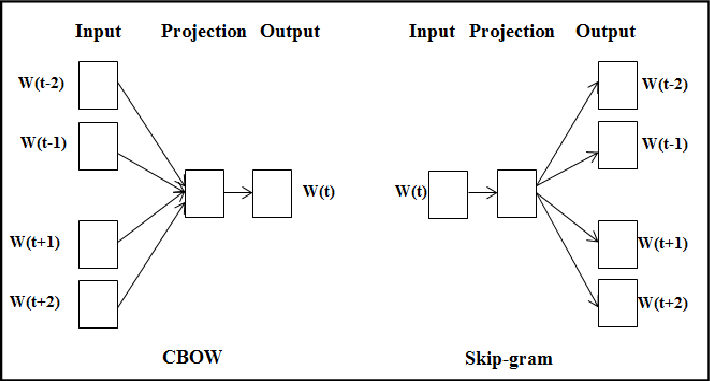

In [172]:
model = Word2Vec(sentences=d_1["ig"], window = 2, min_count=0,iter=100, sg=1)

In [196]:
model_2 = Word2Vec(sentences=d_1["ig"], window = 2, min_count=0,iter=100, sg=0)

In [181]:
model2 = Word2Vec(sentences=d_1["only"], window = 2, min_count=0,iter=100, sg=1)

In [182]:
model.wv.most_similar("피부")

[('돌아가면', 0.6126174330711365),
 ('예민하고', 0.608752965927124),
 ('가꿔주고', 0.607428789138794),
 ('아토피', 0.5987005233764648),
 ('예민해진', 0.5942854285240173),
 ('시키는게', 0.5864484310150146),
 ('근본', 0.5761299133300781),
 ('맞춰주니까', 0.5760341882705688),
 ('최대로', 0.5740557312965393),
 ('무너진', 0.5734658241271973)]

In [198]:
model_2.wv.most_similar(["피부","제품"])

[('클렌징', 0.647240936756134),
 ('얼굴', 0.5877125263214111),
 ('것', 0.5787587761878967),
 ('자극', 0.5729345083236694),
 ('폼클렌징', 0.5705985426902771),
 ('사용', 0.5661465525627136),
 ('오일', 0.5654831528663635),
 ('에', 0.5636672973632812),
 ('세안', 0.5581235289573669),
 ('모공', 0.5491353869438171)]

In [200]:
model2.wv.most_similar("피부")

[('약하거나', 0.6060938835144043),
 ('시켜주더라고요', 0.5944314002990723),
 ('닦아내는거라고', 0.5924679040908813),
 ('민감한', 0.5915215611457825),
 ('민감', 0.5849418640136719),
 ('줄여줘서', 0.5844141840934753),
 ('맞춰주니까', 0.5789906978607178),
 ('알맞고', 0.5787634253501892),
 ('민쁘언', 0.57778000831604),
 ('최대로', 0.5776666402816772)]

In [194]:
model.wv.most_similar("제품")

[('폼클렌징', 0.5768194198608398),
 ('아이템', 0.5705595016479492),
 ('신선하게', 0.5589402914047241),
 ('나누어서', 0.5572651028633118),
 ('원스톱', 0.5498827695846558),
 ('본질', 0.5465609431266785),
 ('용하다', 0.5457282662391663),
 ('했었음', 0.536040723323822),
 ('말씀드릴꺼', 0.5355784296989441),
 ('해서지우는데', 0.5350209474563599)]

In [195]:
model.wv.most_similar("자극")

[('로자', 0.5825341939926147),
 ('순하기', 0.5780564546585083),
 ('부담', 0.573272705078125),
 ('리듀어포밍클렌저', 0.5675293207168579),
 ('되어져요', 0.5556029081344604),
 ('화하였고', 0.549258828163147),
 ('가벼우니까', 0.5472030639648438),
 ('자극받아', 0.5452578663825989),
 ('순하게세안', 0.5450688600540161),
 ('연약한', 0.5423044562339783)]

### 원하는것만 골라서 하면 성능이 떨어지는 듯 하다.

# Topic modeling

In [255]:
documents = d_1["words"]

In [256]:
random.seed(0)
D = len(documents)

K=5
document_topics = [[random.randrange(K) for word in document] for document in documents]
document_topic_counts = [Counter() for _ in documents]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
document_lengths = list(map(len, documents))
distinct_words = set(word for document in documents for word in document)
V = len(distinct_words)

D = len(documents)
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /(document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /(topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1


for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [257]:
for i in range(len(document_topic_counts)):
    docu_ = document_topic_counts[i]
    try:
        topic_most =  docu_.most_common(1)[0][0]
        #print(topic_most)
        words = topic_word_counts[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 

In [250]:
documents = d_1["only"]

In [251]:
random.seed(0)
D = len(documents)

K=5
document_topics = [[random.randrange(K) for word in document] for document in documents]
document_topic_counts = [Counter() for _ in documents]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
document_lengths = list(map(len, documents))
distinct_words = set(word for document in documents for word in document)
V = len(distinct_words)

D = len(documents)
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /(document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /(topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1


for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [252]:
# 2 = 3번쨰 문서가 4개중 어디에 가장 가까운가?
# 여기서는 3번쨰 topic word에 해당한다.
print(document_topic_counts[2])
document_topic_counts[2].most_common(1)[0][0]

Counter({1: 2948, 4: 2936, 3: 2928, 0: 2904, 2: 2870})


1

In [265]:
topic_word_counts[1].most_common(10)

[('이', 3554),
 ('을', 3186),
 ('에', 2878),
 ('피부', 2106),
 ('가', 1638),
 ('사용', 1594),
 ('은', 1474),
 ('클렌징', 1428),
 ('제품', 1338),
 ('를', 1318)]

In [254]:
for i in range(len(document_topic_counts)):
    docu_ = document_topic_counts[i]
    try:
        topic_most =  docu_.most_common(1)[0][0]
        #print(topic_most)
        words = topic_word_counts[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2052), ('사용', 1562), ('클렌징', 1390), ('제품', 1370)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
None
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2052), ('사용', 1562), ('클렌징', 1390), ('제품', 1370)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2114), ('사용', 1526), ('클렌징', 1460), ('제품', 1384)]
None
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2114), ('사용', 1526), ('클렌징', 1460), ('제품', 1384)]

In [261]:
documents = d_1["ig"]

In [262]:
random.seed(0)
D = len(documents)

K=5
document_topics = [[random.randrange(K) for word in document] for document in documents]
document_topic_counts = [Counter() for _ in documents]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
document_lengths = list(map(len, documents))
distinct_words = set(word for document in documents for word in document)
V = len(distinct_words)

D = len(documents)
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /(document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /(topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1


for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [263]:
for i in range(len(document_topic_counts)):
    docu_ = document_topic_counts[i]
    try:
        topic_most =  docu_.most_common(1)[0][0]
        #print(topic_most)
        words = topic_word_counts[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3482), ('을', 3124), ('에', 2760), ('피부', 2034)]
None
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3482), ('을', 3124), ('에', 2760), ('피부', 2034)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
None
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3444), ('을', 3052), ('에', 2808), ('피부', 2120)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
None
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3

In [258]:
documents = d_1["Noun"]

In [259]:
random.seed(0)
D = len(documents)

K=5
document_topics = [[random.randrange(K) for word in document] for document in documents]
document_topic_counts = [Counter() for _ in documents]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
document_lengths = list(map(len, documents))
distinct_words = set(word for document in documents for word in document)
V = len(distinct_words)

D = len(documents)
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /(document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /(topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1


for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [260]:
for i in range(len(document_topic_counts)):
    docu_ = document_topic_counts[i]
    try:
        topic_most =  docu_.most_common(1)[0][0]
        #print(topic_most)
        words = topic_word_counts[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
None
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2144), ('사용', 1564), ('클렌징', 1442), ('제품', 1410)]
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
None
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]

#### topic 별로 너무 공통적인 것이 많다.

In [267]:
model.wv.most_similar("피부")

[('돌아가면', 0.6126174330711365),
 ('예민하고', 0.608752965927124),
 ('가꿔주고', 0.607428789138794),
 ('아토피', 0.5987005233764648),
 ('예민해진', 0.5942854285240173),
 ('시키는게', 0.5864484310150146),
 ('근본', 0.5761299133300781),
 ('맞춰주니까', 0.5760341882705688),
 ('최대로', 0.5740557312965393),
 ('무너진', 0.5734658241271973)]

In [268]:
model.wv.most_similar("사용")

[('세안', 0.5895565748214722),
 ('대단히', 0.5791505575180054),
 ('깨끗하긴', 0.5728138089179993),
 ('』', 0.5664913654327393),
 ('사용설명서', 0.5583900213241577),
 ('참여', 0.5530098676681519),
 ('활용', 0.552308976650238),
 ('있다길래', 0.551212728023529),
 ('부담스러워', 0.5493499040603638),
 ('때데', 0.546280562877655)]

In [269]:
model.wv.most_similar("클렌징")

[('렌징', 0.664023756980896),
 ('징', 0.6316677927970886),
 ('클렌징오일', 0.6279500722885132),
 ('세안', 0.6020680069923401),
 ('클렌', 0.599287748336792),
 ('https://coupa.ng/buNhnZ', 0.5896790623664856),
 ('딥클렌징', 0.5854046940803528),
 ('하져', 0.5827184915542603),
 ('있는클렌징', 0.5764955282211304),
 ('😆😆', 0.5760602951049805)]